In [1]:
# Import libraries. You may or may not use all of these.
# !pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

2024-02-04 20:19:14.310262: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# Import data
# !wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
# Convert categorical data to numbers
df_encoded = pd.get_dummies(dataset, columns=['sex', 'smoker', 'region'])
df_encoded

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,True,False,False,True,False,False,False,True
1,18,33.8,1,1725.55,False,True,True,False,False,False,True,False
2,28,33.0,3,4449.46,False,True,True,False,False,False,True,False
3,33,22.7,0,21984.47,False,True,True,False,False,True,False,False
4,32,28.9,0,3866.86,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,False,True,True,False,False,True,False,False
1334,18,31.9,0,2205.98,True,False,True,False,True,False,False,False
1335,18,36.9,0,1629.83,True,False,True,False,False,False,True,False
1336,21,25.8,0,2007.95,True,False,True,False,False,False,False,True


In [4]:
# Split the dataset into train and test
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_encoded, test_size=0.2, random_state=42)

In [5]:
# Create train_labels and test_labels
train_labels = train_df.pop('expenses')
test_labels = test_df.pop('expenses')

In [6]:
# Create a regression model and train it using the train dataset:
from sklearn.svm import SVR

model = SVR()
model.fit(train_df, train_labels)

SVR()

In [7]:
# Evaluate the model
mae = model.score(test_df, test_labels)
print("Mean Absolute Error:", mae)

Mean Absolute Error: -0.07248631521477278


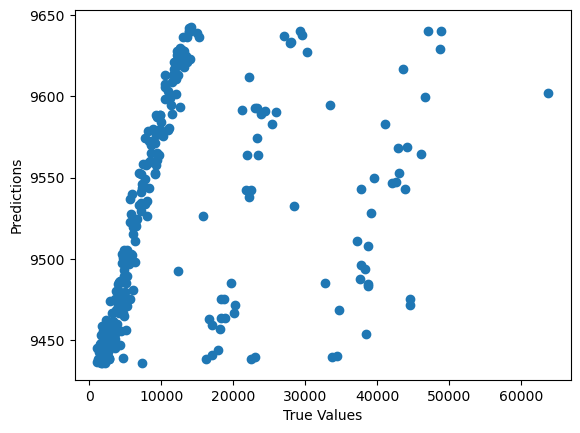

In [8]:
# Predict expenses using the test dataset and graph the results

predictions = model.predict(test_df)

plt.scatter(test_labels, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

Testing set Mean Abs Error: -0.07 expenses
You passed the challenge. Great job!


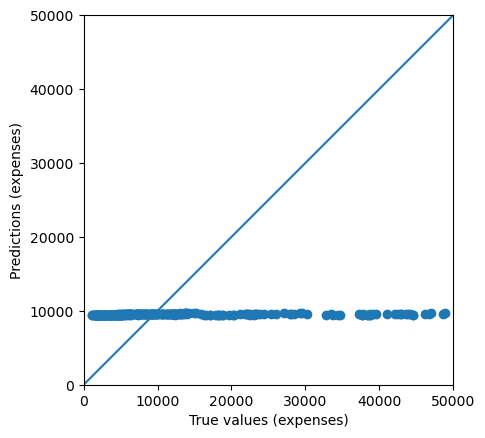

In [11]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
mae = model.score(test_df, test_labels)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_df).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)